In [1]:
%matplotlib notebook
import sys
sys.path.append('/home/qsimexpcontrol/LabRAD')
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
WL = 369.5e-9

In [2]:
cavityw0 = np.sqrt((150e-3*369.5e-9)/(2*np.pi))
print cavityw0

9.39210451436e-05


In [3]:
def waist_fit(z, z0, w0, WL = 369.5e-9):
    zR = np.pi*w0**2/WL
    return w0*np.sqrt(1 + ((z - z0)/zR)**2)

<IPython.core.display.Javascript object>


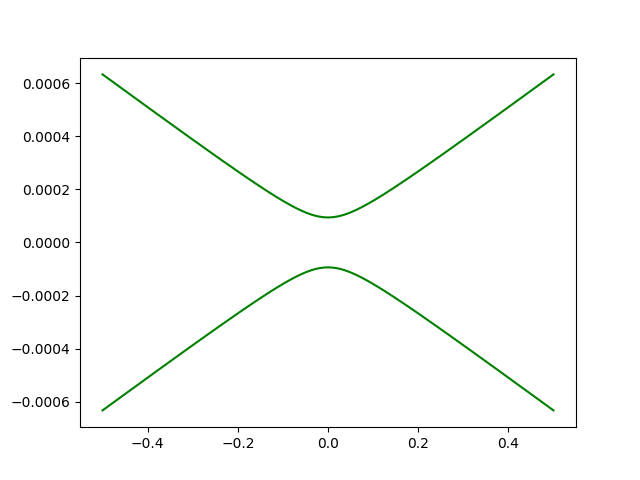

In [7]:
z = np.array([35.0,34.0,33.0,32.0,31.0,30.0])*0.0254
z2 = np.linspace(-0.5,0.5, 500)
y = np.array([270.0,285.0,320.0,335.0,385.0,420.0])*1e-6

#popt, pcov = curve_fit(waist_fit, z, y, p0 = [0.204, 2.46e-5])
#fitdata = waist_fit(z2, z0 = popt[0], w0 = popt[1])
#print popt
cavityw0 = 94e-6
cavityz0 = 0
cavitydata = waist_fit(z2, z0 = cavityz0, w0 = cavityw0)
#plt.scatter(z,y)

#plt.plot(z2, fitdata, 'b')
#plt.plot(z2, -fitdata, 'b')
plt.plot(z2, cavitydata, 'g')
plt.plot(z2, -cavitydata, 'g')
#plt.ylim([-0.0008, 0.0008])
#plt.xlim([-10.0,10.0])

In [5]:
from lenspy import lenspy, lenses

In [6]:
source = lenses.source(np.array([0.5, 0.0]), -10.0)
setup = lenspy.lenspy(init_source = source)
setup.add_element(lenses.thinlense(125.0, 10.0))
setup.add_element(lenses.thinlense(-110, 205.0))
setup.add_element(lenses.freespace(10, 100))
setup.plot_setup()


setup is:
Position, Type, exiting angle
-10.0 source 0.0
10.0 thinlense -0.004
100 freespace -0.004
205.0 thinlense -0.00690909090909



In [7]:
x = [296,1295.5]
y = [0.469,0.052]
plt.plot(x,y)
np.polyfit(x,y,1)

array([ -4.17208604e-04,   5.92493747e-01])

In [8]:
(1.8)*(25.4)*-0.0069 + 2.495

2.179532

In [9]:
data = np.loadtxt('/home/qsimexpcontrol/plots/369_cavity/T0000RF1_no_header.CSV', delimiter=',')

In [10]:
x_conv = 13.6/0.00318645 # MHz/s
x_offset = 0.00645575
y_max = 4.8635
scaled_x = (data[:,0] - x_offset)*x_conv
plt.xlabel('detuning MHz')
plt.ylabel('amplitude (A.U.)')
plt.title('369 Cavity transmission with 13.6 MHz sidebands')
plt.plot(scaled_x, data[:,1]/y_max)


In [11]:
def lorentzfunc(x, x0, gamma, A):
   return (A/(2*np.pi)) * gamma/((x - x0)**2 + (gamma/2)**2)

In [12]:
lorentzfit, pcov1 = curve_fit(lorentzfunc, scaled_x[75000:88000],data[:,1][75000:88000]/y_max, p0=[-1.0,0.01, 1])


In [13]:
print lorentzfit
plt.plot(scaled_x[75000:88000], lorentzfunc(scaled_x[75000:88000], lorentzfit[0], lorentzfit[1], lorentzfit[2]))
plt.plot(scaled_x[75000:88000], data[:,1][75000:88000]/y_max)

[ 0.00312823  1.2121351   1.7717938 ]
